In [6]:
from LRR_lib import *
import torchvision.utils as vutils

In [7]:
outf = '/home/shyam.nandan/Practice/LRR/Results/V1';
model = LRR();
model = torch.nn.DataParallel(model, device_ids=range(torch.cuda.device_count()))
checkpoint = torch.load('Models/LRR_pascal_best_model_final.pkl');
model.load_state_dict(checkpoint['model_state'],True);

In [18]:
data_loader = get_loader('pascal')
data_path = get_data_path('pascal')
v_loader = data_loader(data_path, is_transform=True, split='val', img_size=(224, 224))
valloader = data.DataLoader(v_loader, batch_size=1, num_workers=8,shuffle=True)

In [19]:
%matplotlib inline
def show(img):
    npimg = img.numpy()
    plt.figure()
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

25it [00:02, 10.79it/s]Process Process-84:
Process Process-82:
Process Process-81:
Process Process-83:
Process Process-87:
Process Process-88:
Process Process-85:
Process Process-86:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", l

KeyboardInterrupt: 

  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
  File "/home/shyam.nandan/.local/lib/python2.7/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
    r = index_

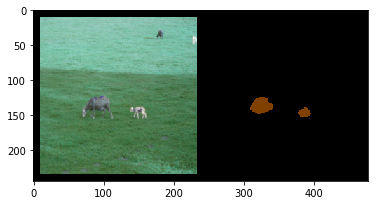

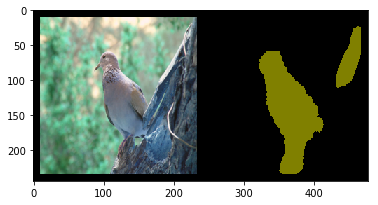

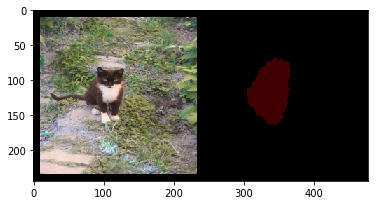

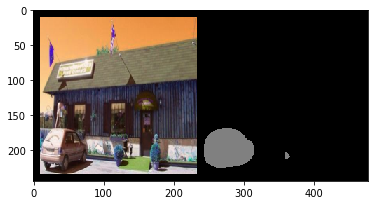

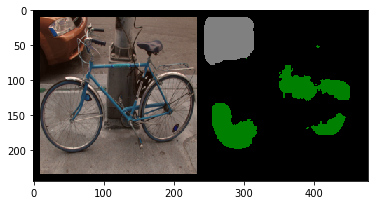

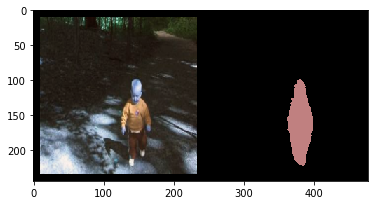

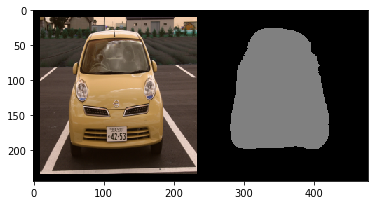

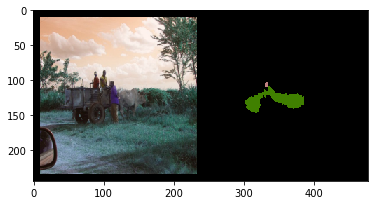

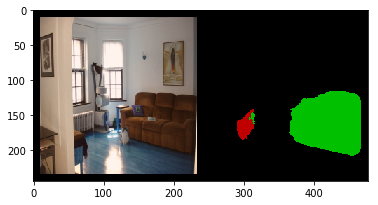

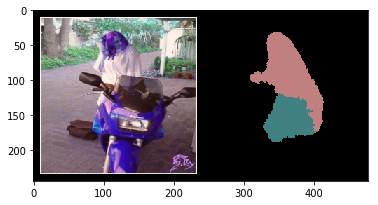

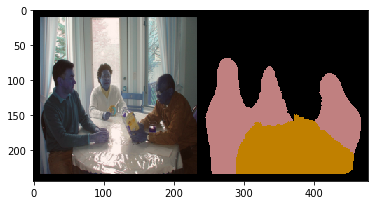

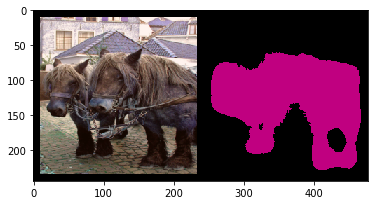

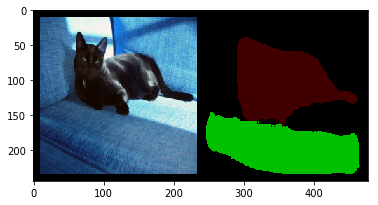

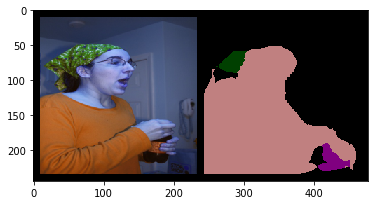

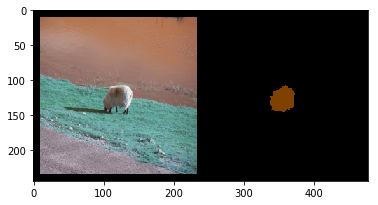

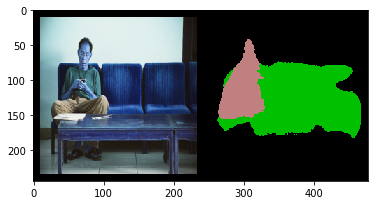

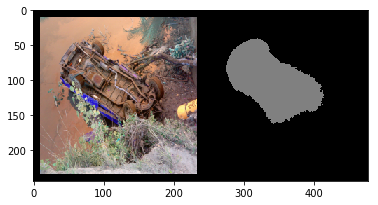

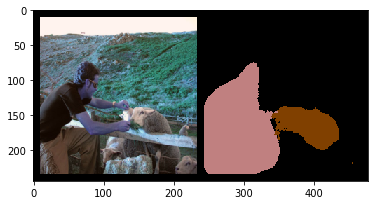

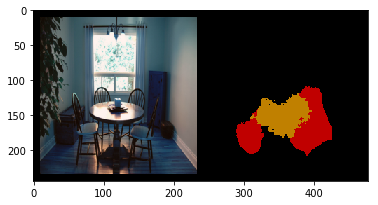

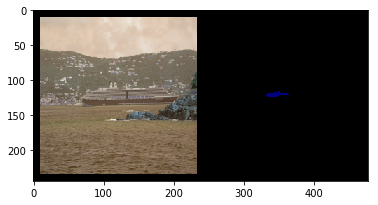

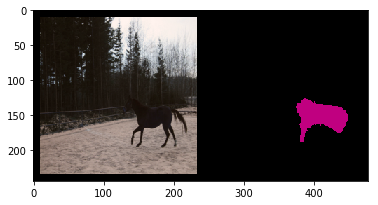

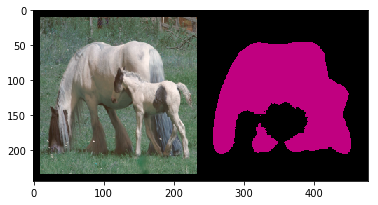

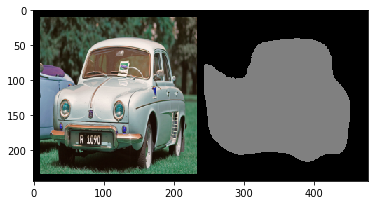

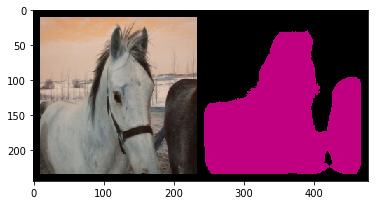

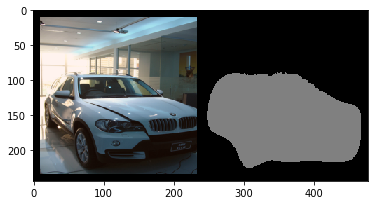

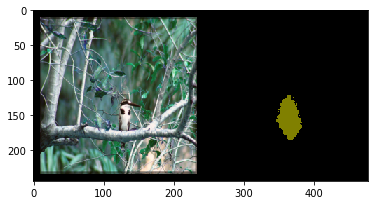

In [21]:
model.eval()
for i_val, (images_val, labels_val) in tqdm(enumerate(valloader)):            
    images_val = Variable(images_val.cuda(), volatile=True)
    labels_val = Variable(labels_val.cuda(), volatile=True)
    _,_,output = model(images_val)
    img = images_val.data.cpu()[0]
    output = output.data.max(1)[1][0].cpu().type(torch.FloatTensor).transpose(1, 0)
    output = v_loader.decode_segmap(np.array(output, dtype=np.uint8))
    output = torch.from_numpy(output).type(torch.FloatTensor).permute(2,1,0)
    imglist = [img, output]
    show(make_grid(imglist, padding=10))
    
    #vutils.save_image(images_val.data,'%s/%05dImg.png' % (outf, i_val),normalize=True)
    #vutils.save_image(output,'%s/%05dSegImg.png' % (outf, i_val),normalize=True)